In [54]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

C:\Users\User\AppData\Local\Temp/ipykernel_21216/1649430976.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [55]:
def function(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)
df.head()

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


Datetime
2004-03-10 18:00:00    1056.0
2004-03-10 19:00:00    1174.0
2004-03-10 20:00:00    1140.0
2004-03-10 21:00:00    1092.0
2004-03-10 22:00:00    1205.0
Name: PT08.S3(NOx), dtype: float64


<AxesSubplot:xlabel='Datetime'>

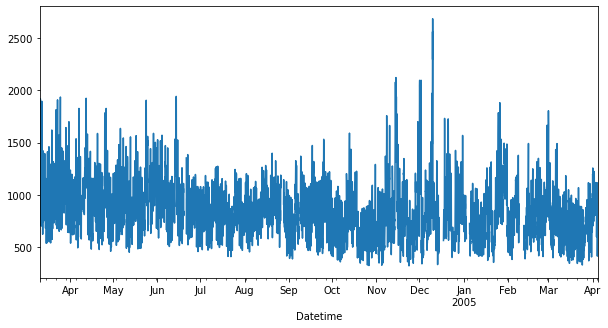

In [56]:
pt = df["PT08.S3(NOx)"].copy()
print(pt.head())
pt.plot(figsize=(10,5))

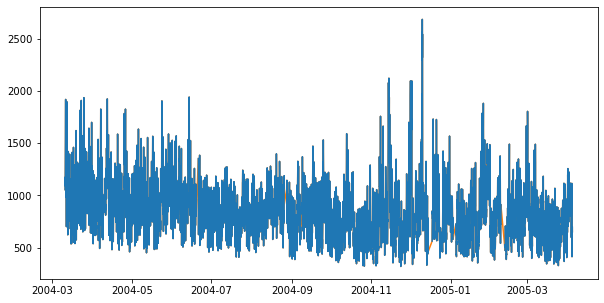

In [57]:
pt.interpolate(inplace=True)

plt.figure(figsize=(10,5))
plt.plot(df["PT08.S3(NOx)"], zorder=2)
plt.plot(pt, zorder=1)

Text(0.5, 0, 'PT08.S3(NOx)')

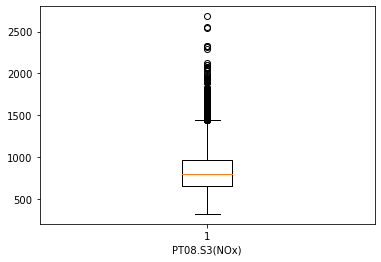

In [58]:
plt.boxplot(pt)
plt.xlabel("PT08.S3(NOx)")

In [59]:
q1 = pt.quantile(0.25)
q2 = pt.median()
q3 = pt.quantile(0.75)

iqr = q3-q1
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr

print(q1 ,q2, q3, iqr)
print(upper_fence, lower_fence)

654.0 804.0 968.0 314.0
1439.0 183.0


In [60]:
outliers_iqr = pt.loc[(pt>upper_fence)|(pt<lower_fence)]
outliers_iqr

Datetime
2004-03-11 00:00:00    1462.0
2004-03-11 01:00:00    1453.0
2004-03-11 02:00:00    1579.0
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
                        ...  
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
2005-03-07 04:00:00    1490.0
Name: PT08.S3(NOx), Length: 239, dtype: float64

In [61]:
mask_iqr = pt.index.isin(outliers_iqr.index)
mask_iqr[:20]

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False])

In [62]:
pt_refined_iqr = pt.copy()
pt_refined_iqr[mask_iqr] = np.nan
pt_refined_iqr

Datetime
2004-03-10 18:00:00    1056.0
2004-03-10 19:00:00    1174.0
2004-03-10 20:00:00    1140.0
2004-03-10 21:00:00    1092.0
2004-03-10 22:00:00    1205.0
                        ...  
2005-04-04 10:00:00     539.0
2005-04-04 11:00:00     604.0
2005-04-04 12:00:00     603.0
2005-04-04 13:00:00     702.0
2005-04-04 14:00:00     654.0
Name: PT08.S3(NOx), Length: 9357, dtype: float64

<AxesSubplot:xlabel='Datetime'>

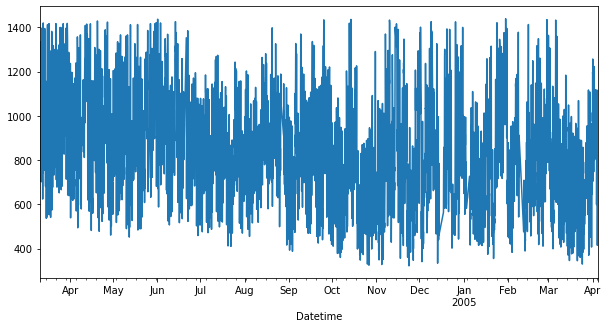

In [63]:
pt_refined_iqr.interpolate(inplace=True)
pt_refined_iqr.plot(figsize=(10,5))

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PT08.S3(NOx)', ylabel='Density'>

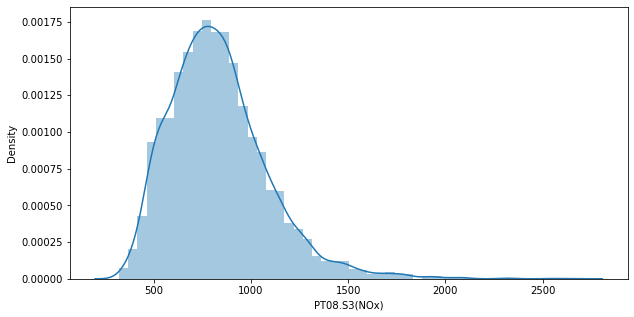

In [64]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.distplot(pt)

In [65]:
mean = np.mean(pt)
std = np.std(pt)
print(mean, std)

832.7588970823982 255.69616900657363


In [66]:
thres = 3

outliers = pt.loc[np.abs((pt-mean)/std) > thres]
outliers

Datetime
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
2004-03-11 05:00:00    1918.0
2004-03-11 06:00:00    1738.0
2004-03-12 03:00:00    1680.0
                        ...  
2005-02-28 06:00:00    1665.0
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
Name: PT08.S3(NOx), Length: 111, dtype: float64

In [67]:
mask = pt.index.isin(outliers_Z.index)
mask[:20]

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False])

In [68]:
pt_refined = pt.copy()
pt_refined[mask] = np.nan
pt_refined[mask]

Datetime
2004-03-11 03:00:00   NaN
2004-03-11 04:00:00   NaN
2004-03-11 05:00:00   NaN
2004-03-11 06:00:00   NaN
2004-03-12 03:00:00   NaN
                       ..
2005-02-28 06:00:00   NaN
2005-03-01 03:00:00   NaN
2005-03-01 04:00:00   NaN
2005-03-01 05:00:00   NaN
2005-03-01 06:00:00   NaN
Name: PT08.S3(NOx), Length: 111, dtype: float64

<AxesSubplot:xlabel='Datetime'>

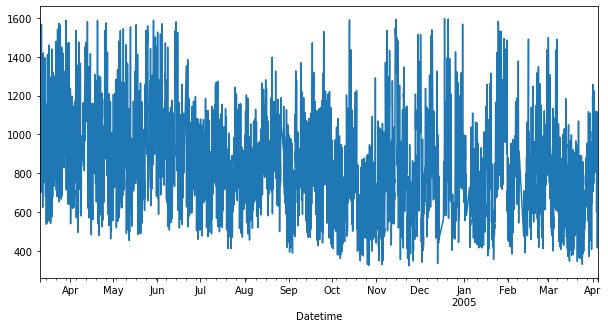

In [69]:
pt_refined.interpolate(inplace=True)
pt_refined.plot(figsize=(10,5))